## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

**NOTE**: This dataset is provided as a special version of this file that has some extra feature engineering to do. 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we will build a model that can predict whether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview


There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Imports 

We will also create a **function** so that we can easily read the labels of description of each column of the data set we need!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


We want our function to do this, so we can **easily access the description** of a column we want to inspect:

In [4]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [5]:
def feature_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Loading Data and further info

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# 1: Exploratory Data Analysis

** First we want to see info about the loan_status column which is the one we want to predict **

In [10]:
sns.set_style('darkgrid')

<Axes: xlabel='loan_status', ylabel='count'>

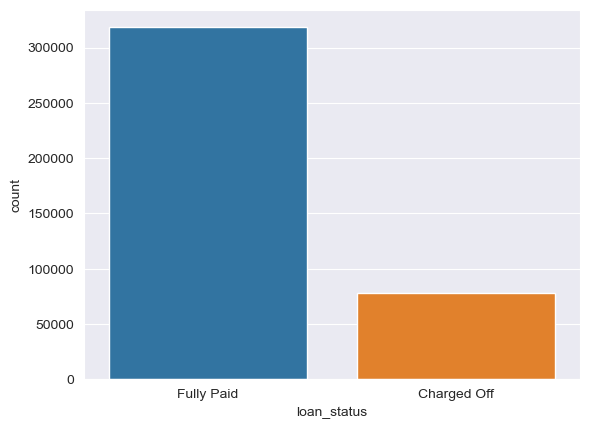

In [11]:
sns.countplot(df, x= 'loan_status')

** We also want to inspect the loan amounts that are granted **

<Axes: xlabel='loan_amnt', ylabel='Count'>

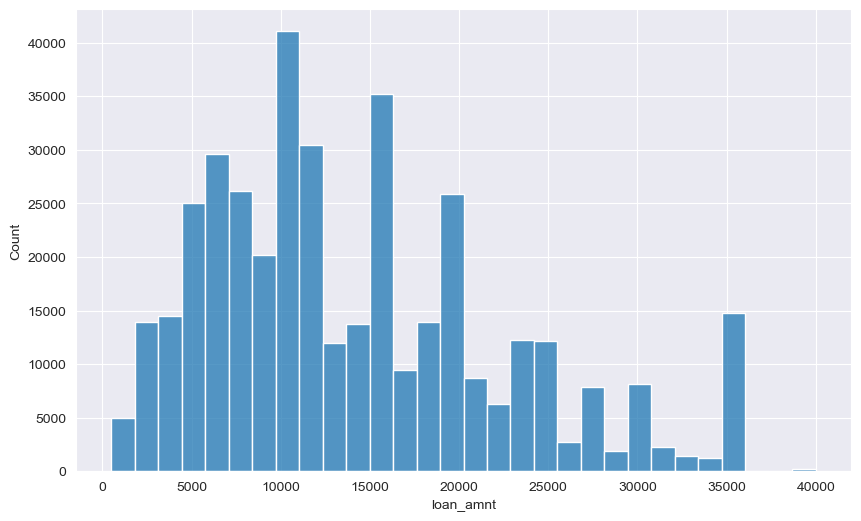

In [12]:
plt.figure(figsize= (10,6))
sns.histplot(df, x= 'loan_amnt', bins= 30)

We observe that most loans are between 5k - 20k.

** Next we will explore the correlation between the continuous feature values and explore it in a heatmap **

In [13]:
df.corr(numeric_only = True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

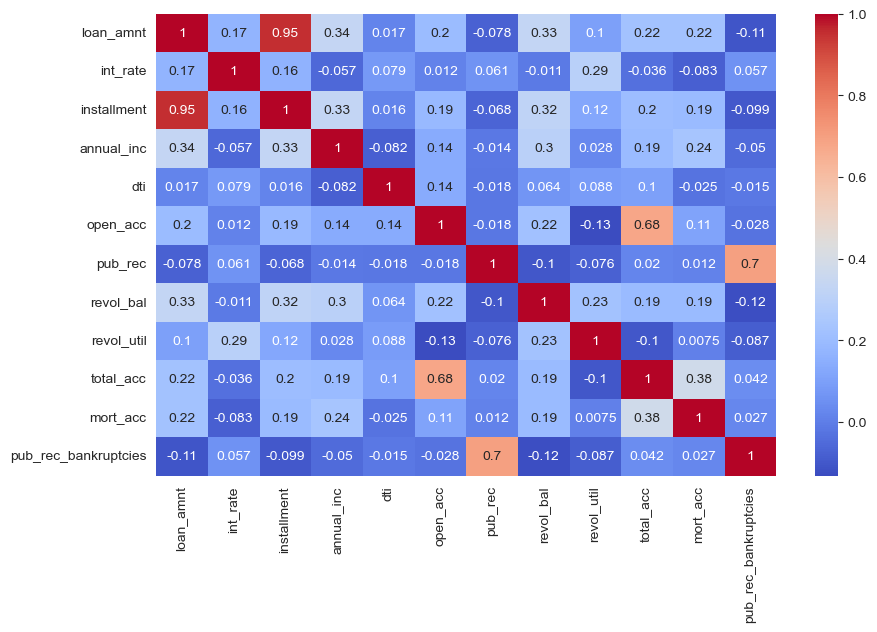

In [14]:
plt.figure(figsize= (10, 6))
sns.heatmap(df.corr(numeric_only= True), cmap= 'coolwarm', annot= True)

We observe almost a perfect correlation between loan amount and installments. So we are going to inspect this relationship a bit further.

In [15]:
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [16]:
feature_info('installment')

The monthly payment owed by the borrower if the loan originates.


Obviously this is expected since the higher the loan amount the higher monthly payments will be. We are going to plot that into a scatterplot 

<Axes: xlabel='installment', ylabel='loan_amnt'>

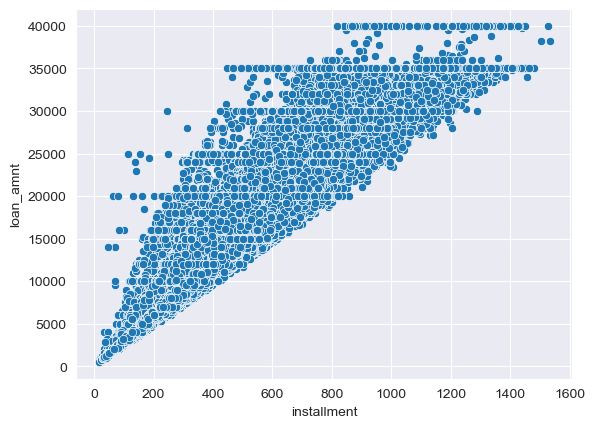

In [17]:
sns.scatterplot(df, y= 'loan_amnt', x= 'installment')

** Now we want to see depending on the loan amount which are fully paid back and which not **

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

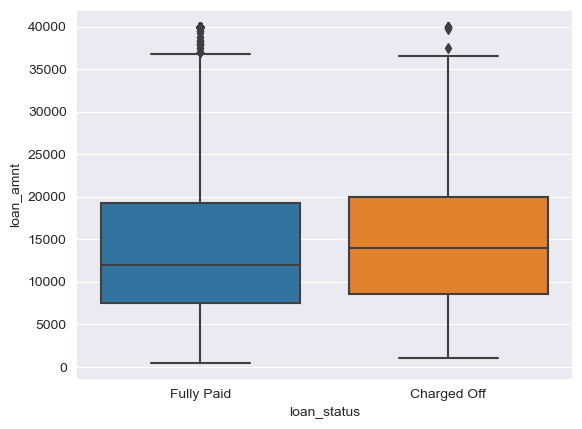

In [18]:
sns.boxplot(df, x= 'loan_status', y= 'loan_amnt')

And we observe that in most cases the loan amount does not give us much info about if the loan will be paid back or not. Below we see more specific numbers for the comparison between the two.

In [19]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


An interesting thing we observe here is that a loan even as low as 1k ended up not being fully paid.


** Next we will inspect the grades and subgrades that are assigned to each individual **

In [20]:
feature_info('grade')

LC assigned loan grade


In [21]:
feature_info('sub_grade')

LC assigned loan subgrade


In [22]:
np.sort(df['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [23]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

Now let's see based on these grades how many did actually 'overachieved' and 'underachieved':

<Axes: xlabel='grade', ylabel='count'>

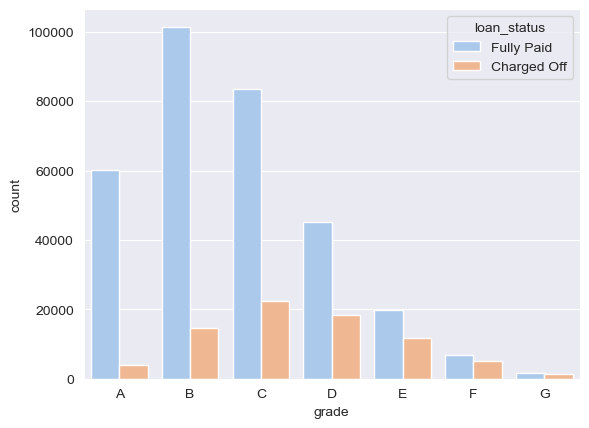

In [24]:
sns.countplot(df, x= 'grade', hue= 'loan_status', order= np.sort(df['grade'].unique()), palette= 'pastel' )

<Axes: xlabel='sub_grade', ylabel='count'>

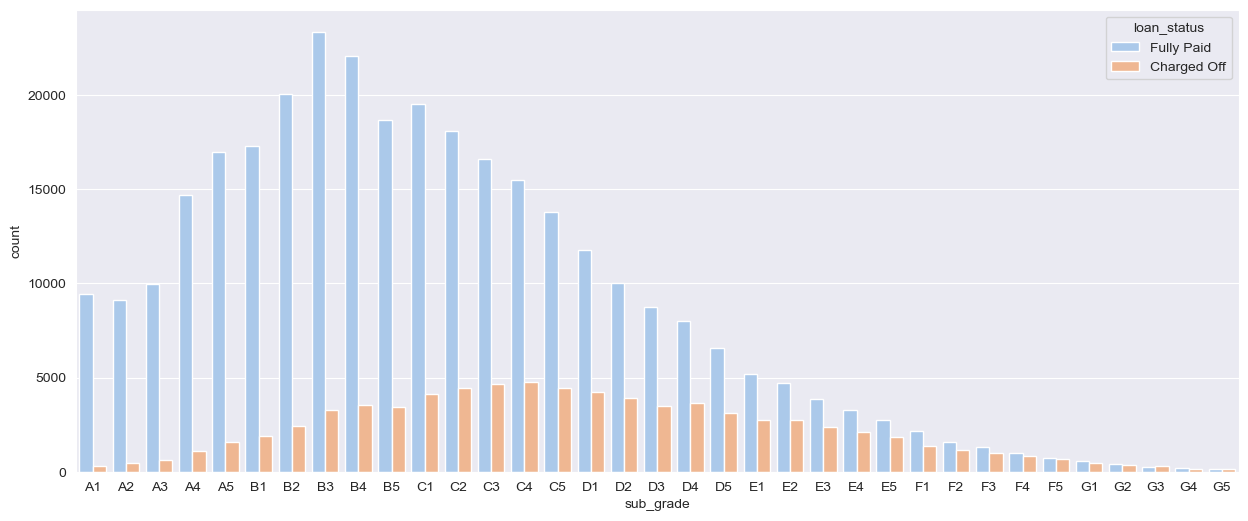

In [25]:
plt.figure(figsize= (15,6))
sns.countplot(df, x= 'sub_grade', hue= 'loan_status', order= np.sort(df['sub_grade'].unique()), palette= 'pastel' )

**We will compute the percentages of loans that are fully paid grouped by each grade:**

In [26]:
E_count = df[df['grade']== 'E'].groupby('loan_status')['grade'].count()

In [27]:
E_count

loan_status
Charged Off    11765
Fully Paid     19723
Name: grade, dtype: int64

In [28]:
#A function that computes the percentage of loans fully paid per grade or sub_grade
def percent_fully_paid(grades, name):
    print(f'Percentage of fully paid loans for individuals with {name}:\n')
    for i in grades:
        temp = df[df[name]== i].groupby('loan_status')[name].count()
        percent = round(((temp[1])/(temp[0] + temp[1])) *100, ndigits= 2)
        print(f'{i}: \t{percent} %')

In [29]:
grades = np.sort(df['grade'].unique()).tolist()
grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [30]:
percent_fully_paid(grades, 'grade')

Percentage of fully paid loans for individuals with grade:

A: 	93.71 %
B: 	87.43 %
C: 	78.82 %
D: 	71.13 %
E: 	62.64 %
F: 	57.21 %
G: 	52.16 %


We observe that loans of people with grades F and G have the worse return as expected near 50 %. So we will inspect a bit closer the subgrades of these two categories of people.

In [31]:
df_f_g = df[(df['grade']== 'F') | (df['grade']== 'G')]

<Axes: xlabel='sub_grade', ylabel='count'>

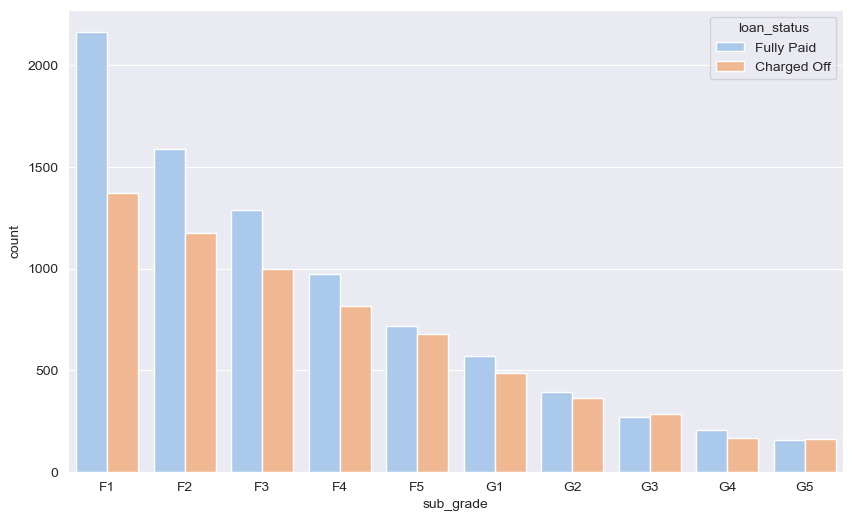

In [32]:
plt.figure(figsize= (10,6))
sns.countplot(df_f_g, x= 'sub_grade', hue= 'loan_status',
              order= np.sort(df_f_g['sub_grade'].unique()), palette= 'pastel' )

In [33]:
f_g_subgrades = np.sort(df_f_g['sub_grade'].unique()).tolist()
f_g_subgrades

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

In [34]:
percent_fully_paid(f_g_subgrades, 'sub_grade')

Percentage of fully paid loans for individuals with sub_grade:

F1: 	61.26 %
F2: 	57.52 %
F3: 	56.39 %
F4: 	54.39 %
F5: 	51.32 %
G1: 	53.88 %
G2: 	51.72 %
G3: 	48.91 %
G4: 	55.08 %
G5: 	49.68 %


**Next we will create a new column instead of loan_status called loan_repaid which will be filled with '1' if the loan was fully paid and '0' if the loan was charged off.**

In [35]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [36]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [37]:
df[['loan_repaid', 'loan_status']].head(5)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [38]:
#df = df.drop('loan_status', axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

We will create a barplot to see the corrolation of the numeric features to this new column:

<Axes: >

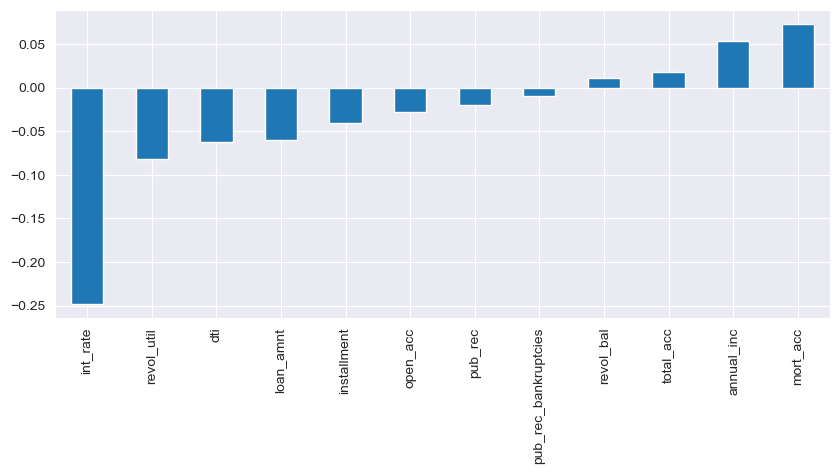

In [40]:
plt.figure(figsize= (10,4))
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values(ascending= True).plot(kind= 'bar')

# 2: Data Processing

The **GOAL** next is to:
- Remove or fill any missing data
- Remove unnecessary or repetitive features
- Convert categorical string features to dummy variables

In [41]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
#And as a percentage
(df.isnull().sum()/len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

** So after finding the columns with the missing data we begin to inspect **

First we will inspect the columns emp_title and emp_length

In [45]:
#As a reminder
feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [46]:
feature_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [47]:
df['emp_title'].nunique()

173105

In [48]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

Too many unique values in this column which means we could not use dummy variables here. So better to remove this column.

In [49]:
df = df.drop('emp_title', axis= 1)

Now we move on to **emp_length:**

In [50]:
df['emp_length'].nunique()

11

In [51]:
emp_length = df['emp_length'].unique().tolist()
emp_length

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year',
 nan]

In [52]:
import re

In [53]:
#Make a list from 0 to 10 years
sorted_emp_length= [i for i in range(0,11)]
#A function to convert less than a year to 0 in order to sort correctly
convert = lambda x: int(x) if x.isdigit() else 0
#A for loop to sort list based on years of experience
for i in emp_length[:-1]:
    for j in sorted_emp_length:
        if convert(re.split('[ +]', i)[0]) == j:
            sorted_emp_length[j] = i
sorted_emp_length

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

Let's see if this column matters to our result or not to see if we need it or not for our training coming next:

<Axes: xlabel='emp_length', ylabel='count'>

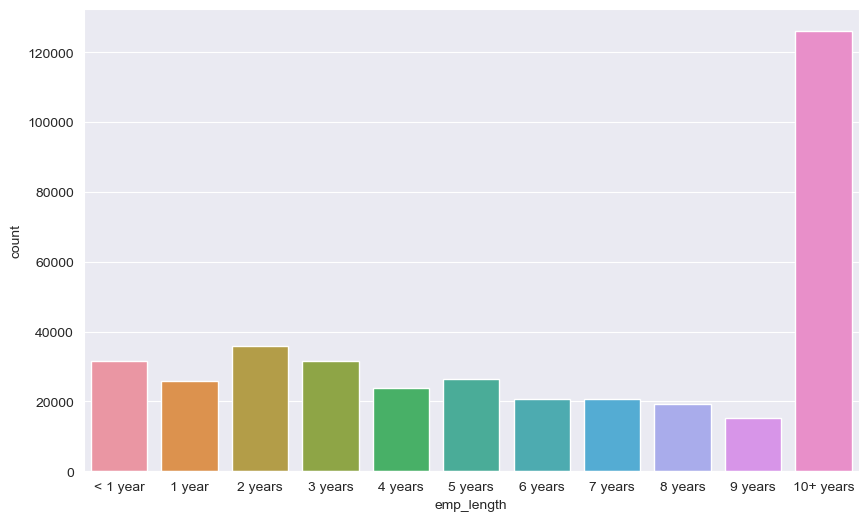

In [54]:
plt.figure(figsize= (10,6))
sns.countplot(df, x= 'emp_length', order= sorted_emp_length)

<Axes: xlabel='emp_length', ylabel='count'>

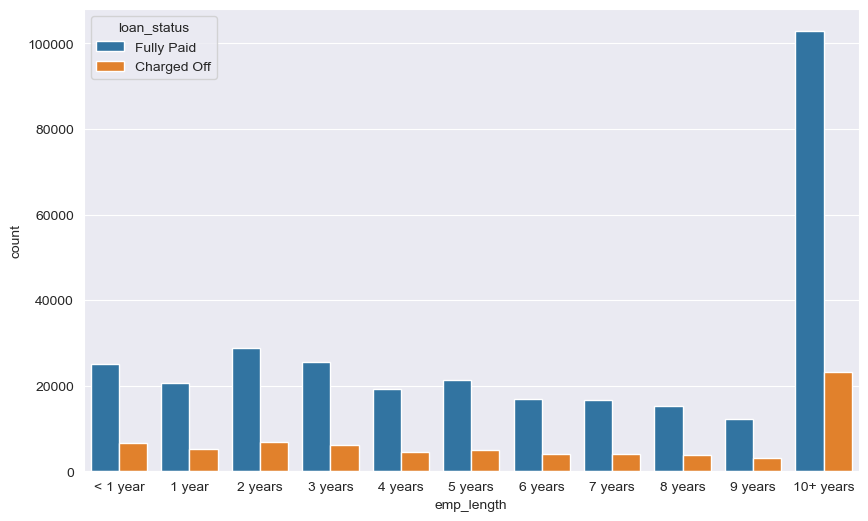

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(df, x= 'emp_length', hue= 'loan_status', order= sorted_emp_length)

We dont really gain much info from these plots about the relation between loan repaid and length of employement. So what we want in order to gain more useful info is the percentage of fully paid loans per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [56]:
percent_fully_paid(sorted_emp_length, 'emp_length')

Percentage of fully paid loans for individuals with emp_length:

< 1 year: 	79.31 %
1 year: 	80.09 %
2 years: 	80.67 %
3 years: 	80.48 %
4 years: 	80.76 %
5 years: 	80.78 %
6 years: 	81.08 %
7 years: 	80.52 %
8 years: 	80.02 %
9 years: 	79.95 %
10+ years: 	81.58 %


We see in all categories about 80% of the people has paid back their loans. So nothing much useful comes from this column also and we will remove it from our training data.

In [57]:
df = df.drop('emp_length', axis=1)

#### Reminder about missing data

In [58]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [59]:
feature_info('title')

The loan title provided by the borrower


In [60]:
feature_info('purpose')

A category provided by the borrower for the loan request. 


In [61]:
df['title'].value_counts().head()

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: count, dtype: int64

In [62]:
df['purpose'].value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

Seems like there are repeated info in these columns and since there are no missing data in purpose we will drop the title column as well

In [63]:
df = df.drop('title', axis=1)



** Next we will continue with the mort_acc data missing which are a considerable amount **

In [64]:
feature_info('mort_acc')

Number of mortgage accounts.


In [65]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

We will try to find info about how to fill or not these data. We will start by computing the correlation of this column with the other features.

**Correlation with mort_acc column**

In [66]:
df.corr(numeric_only= True)['mort_acc'].sort_values(ascending= False)[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

The most correlated feature seems to be the total_acc column.

In [67]:
feature_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [68]:
df['total_acc'].value_counts().head(10)

total_acc
21.0    14280
22.0    14260
20.0    14228
23.0    13923
24.0    13878
19.0    13876
18.0    13710
17.0    13495
25.0    13225
26.0    12799
Name: count, dtype: int64

In [69]:
df['total_acc'].nunique()

118

We will group by the total_acc column and see the mean value for the mort_acc column.

In [70]:
df.groupby('total_acc')['mort_acc'].mean().head(20)

total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
12.0    0.618034
13.0    0.722124
14.0    0.803482
15.0    0.940142
16.0    1.007405
17.0    1.151269
18.0    1.235885
19.0    1.358013
20.0    1.409380
21.0    1.519932
Name: mort_acc, dtype: float64

In [71]:
df2= round(df.groupby('total_acc')['mort_acc'].mean())
df2

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    3.0
150.0    2.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

In [72]:
#Dictionary with values of the rounded mean mort_acc numbers and keys the total_acc numbers
df2= dict(df2)
df2

{2.0: 0.0,
 3.0: 0.0,
 4.0: 0.0,
 5.0: 0.0,
 6.0: 0.0,
 7.0: 0.0,
 8.0: 0.0,
 9.0: 0.0,
 10.0: 0.0,
 11.0: 1.0,
 12.0: 1.0,
 13.0: 1.0,
 14.0: 1.0,
 15.0: 1.0,
 16.0: 1.0,
 17.0: 1.0,
 18.0: 1.0,
 19.0: 1.0,
 20.0: 1.0,
 21.0: 2.0,
 22.0: 2.0,
 23.0: 2.0,
 24.0: 2.0,
 25.0: 2.0,
 26.0: 2.0,
 27.0: 2.0,
 28.0: 2.0,
 29.0: 2.0,
 30.0: 2.0,
 31.0: 2.0,
 32.0: 2.0,
 33.0: 3.0,
 34.0: 3.0,
 35.0: 3.0,
 36.0: 3.0,
 37.0: 3.0,
 38.0: 3.0,
 39.0: 3.0,
 40.0: 3.0,
 41.0: 3.0,
 42.0: 3.0,
 43.0: 3.0,
 44.0: 3.0,
 45.0: 3.0,
 46.0: 3.0,
 47.0: 3.0,
 48.0: 3.0,
 49.0: 3.0,
 50.0: 3.0,
 51.0: 3.0,
 52.0: 3.0,
 53.0: 3.0,
 54.0: 3.0,
 55.0: 3.0,
 56.0: 3.0,
 57.0: 3.0,
 58.0: 3.0,
 59.0: 3.0,
 60.0: 4.0,
 61.0: 3.0,
 62.0: 3.0,
 63.0: 3.0,
 64.0: 3.0,
 65.0: 3.0,
 66.0: 3.0,
 67.0: 3.0,
 68.0: 3.0,
 69.0: 3.0,
 70.0: 4.0,
 71.0: 3.0,
 72.0: 3.0,
 73.0: 4.0,
 74.0: 3.0,
 75.0: 3.0,
 76.0: 2.0,
 77.0: 3.0,
 78.0: 4.0,
 79.0: 3.0,
 80.0: 3.0,
 81.0: 3.0,
 82.0: 1.0,
 83.0: 2.0,
 84.0: 3.0,
 85.0: 4.0,


** So let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. **

In [73]:
#Data Frame of all the objects with a missing value on mortal accs
mort_na = df[df['mort_acc'].isna() == True]

In [74]:
mort_na[['total_acc', 'mort_acc']].head()

,total_acc,mort_acc
22,7.0,NaN
25,10.0,NaN
32,18.0,NaN
41,16.0,NaN
62,17.0,NaN


In [75]:
len(mort_na[['total_acc', 'mort_acc']])

37795

In [76]:
df['mort_acc'].fillna(df['total_acc'].apply(lambda x: df2[x]), inplace= True)

Checking that everything works as we wanted.

In [77]:
df['mort_acc'][22]

0.0

In [78]:
df2[7.0]

0.0

In [79]:
df['mort_acc'][62]

1.0

In [80]:
df2[17.0]

1.0

In [81]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

** As far as the missing data in columns revol_util and public_rec_bankrunptcies, they account to less than 0.5 % of the data. So we are going to drop this rows with the missing data **

In [82]:
df.dropna(inplace= True)

In [83]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Values and Dummy Variables

** We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns. **

First we will list all non numerical columns

In [84]:
df.select_dtypes(exclude= 'number').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**So we will inspect them 1 by 1 to see how we can use them for our training**

**-Term feature-**

In [85]:
feature_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [86]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [87]:
type(df['term'][0])

str

In [88]:
df['term'][0]

' 36 months'

In [89]:
df['term'] = df['term'].apply(lambda x: 36 if '36' in x else 60)

**-Grade/SubGrade feature-**

We know that grade is part of sub-grade so we can drop the grade feature. Next we will convert sub_grade column to dummy variables dropping the first column and then the sub_grade column. At last we concatenate these two data frames to one main one 

In [90]:
df = df.drop('grade', axis=1)

In [91]:
sub_grade_dummy= pd.get_dummies(df['sub_grade'], drop_first= True)

In [92]:
df = df.drop('sub_grade', axis= 1)

In [93]:
df= pd.concat([df, sub_grade_dummy], axis=1)

**-Verification_status-** and **-Initial_list_status**  features

We will do the same process with the dummy variables for these columns too.

In [94]:
feature_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [95]:
feature_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [96]:
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [97]:
df['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [98]:
vs_dummy = pd.get_dummies(df['verification_status'], drop_first= True)
ils_dummy = pd.get_dummies(df['initial_list_status'], drop_first= True)

In [99]:
df= df.drop(['verification_status', 'initial_list_status'], axis=1)

In [100]:
df = pd.concat([df, vs_dummy, ils_dummy], axis=1)

**-Application_type-** and **-Purpose-** features 

Same here as well

In [101]:
feature_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [102]:
feature_info('purpose')

A category provided by the borrower for the loan request. 


In [103]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [104]:
df['purpose'].nunique()

14

In [105]:
ap_dummy = pd.get_dummies(df['application_type'], drop_first= True)
p_dummy = pd.get_dummies(df['purpose'], drop_first= True)

In [106]:
df= df.drop(['application_type', 'purpose'], axis=1)

In [107]:
df = pd.concat([df, ap_dummy, p_dummy], axis= 1)

In [108]:
#Checking the categorical columns that are left
df.select_dtypes(exclude= ['number', 'boolean']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

**-Home_ownwership feature-**

In [109]:
feature_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [110]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

We want to convert our values to 4 categories: RENT, OWN, MORTGAGE, OTHER. So we replace ANY and NONE with OTHER. Then the same process with dummy variables.

In [111]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if (x=='NONE') | (x== 'ANY') else x)

In [112]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [113]:
ho_dummy = pd.get_dummies(df['home_ownership'], drop_first= True)

In [114]:
df= df.drop('home_ownership', axis=1)

In [115]:
df= pd.concat([df, ho_dummy], axis= 1)

**-Address feature-**

We will extract the zipcode to a new column

In [116]:
df['address'][0].split()[-1]

'22690'

In [117]:
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])

In [118]:
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [119]:
df= df.drop('address', axis=1)

In [120]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

Now that we have more clear categories we can use dummy variables to this column too.

In [121]:
zc_dummy= pd.get_dummies(df['zip_code'], drop_first= True)

In [122]:
df= df.drop('zip_code', axis=1)

In [123]:
df= pd.concat([df, zc_dummy], axis=1)

**-Issue_d feature-**

In [124]:
feature_info('issue_d')

The month which the loan was funded


This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [125]:
df= df.drop('issue_d', axis=1)

**-Earliest_cr_line feature-**

In [126]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [127]:
df['earliest_cr_line'].value_counts().head()

earliest_cr_line
Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
Name: count, dtype: int64

This appears to be a historical time stamp feature. We will extract the year from this feature and then convert it to a numeric feature. We will set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [128]:
df['earliest_cr_line'][0].split('-')[-1]

'1990'

In [129]:
df['earliest_cr_year']= df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))

In [130]:
df['earliest_cr_year'].value_counts().head()

earliest_cr_year
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
Name: count, dtype: int64

In [131]:
df= df.drop('earliest_cr_line', axis=1)

This is now a numeric feature! So we are done for this phase and the only feature left is 'loan_status', which we will drop now since we created a boolean column to replace it (the 'loan_repaid' column).

In [132]:
#Checking the categorical columns that are left
df.select_dtypes(exclude= ['number', 'boolean']).columns

Index(['loan_status'], dtype='object')

In [133]:
df= df.drop('loan_status', axis=1)

In [134]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'w', 'INDIVIDUAL', 'JOINT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', 'earliest_cr_year'],
      dtype='object')

## 3: Train Test Split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
#Convert pandas' data frames to numpy arrays to be compatible with tensorflow
X= df.drop('loan_repaid', axis=1).values
y= df['loan_repaid'].values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=101)

### Normalizing the data

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

We don't want data leakge from the test set so we only fit on the X_train data.

In [140]:
scaler.fit(X_train)

MinMaxScaler()

In [141]:
X_train= scaler.transform(X_train)

In [142]:
X_test= scaler.transform(X_test)

### Creating a model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [144]:
model = Sequential()

model.add(Dense(78, activation= 'relu'))
model.add(Dense(39, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer='adam', loss= 'binary_crossentropy')

We will fit the model to the training data for at least 25 epochs and add in the validation data for later plotting. Also we will add in a batch_size of 256.

In [145]:
model.fit(x= X_train, y= y_train,
         epochs= 25, verbose=1,
         validation_data= (X_test, y_test),
          batch_size= 256)

Epoch 1/25

1236/1236 [==============================] - 7s 4ms/step - loss: 0.2869 - val_loss: 0.2774
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2625 - val_loss: 0.2656
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2666
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2592 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2583 - val_loss: 0.2644
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2580 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2574 - val_loss: 0.2650
Epoch 8/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2571 - val_loss: 0.2622
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2564 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.25

We are going to save this model.

In [146]:
from tensorflow.keras.models import load_model

In [147]:
model.save('lc_1.keras')

## 4: Model Evaluation

** We will plot our model losses **

In [148]:
losses= pd.DataFrame(model.history.history)

In [149]:
losses.head()

,loss,val_loss
0,0.286918,0.277389
1,0.262493,0.265557
2,0.260653,0.266579
3,0.259224,0.262410
4,0.258279,0.264432


<Axes: >

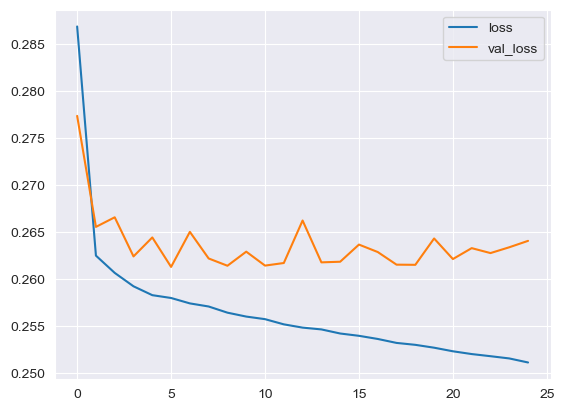

In [150]:
losses.plot()

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 5s 2ms/step


In [153]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9999994e-01],
       ...,
       [8.4546483e-01],
       [9.9998659e-01],
       [2.0502415e-13]], dtype=float32)

In [154]:
#If value is <= 0.5 convert to 0 else 1
y_pred = predictions.round()

In [155]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [156]:
y_test

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [157]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.50      0.63     15658
           1       0.89      0.98      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.88      0.74      0.78     79044
weighted avg       0.89      0.89      0.87     79044



[[ 7764  7894]
 [ 1084 62302]]


**Let's now test it on a random person to see if they can repay their loan or not:**

In [158]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            5200.0
term                     36
int_rate              11.49
installment          171.46
annual_inc          81120.0
                     ...   
48052                  True
70466                 False
86630                 False
93700                 False
earliest_cr_year       2000
Name: 268019, Length: 78, dtype: object

In [159]:
df.shape

(395219, 79)

In [160]:
new_customer = scaler.transform(new_customer.values.reshape(-1,78))

In [161]:
model.predict(new_customer)

1/1 [==============================] - 0s 31ms/step


array([[0.87436235]], dtype=float32)

In [162]:
df['loan_repaid'].iloc[random_ind]

1

Correct Prediction!

## 5: Other model

In this part we will use Dropouts and maybe some other callbacks to impove the performance of the model.

In [163]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model = Sequential()

#Start with as many neurons as features
model.add(Dense(78, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(39, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(19, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer='adam', loss= 'binary_crossentropy')

In [164]:
model.fit(x= X_train, y= y_train,
         epochs= 25, verbose=1,
         validation_data= (X_test, y_test),
          batch_size= 256)

Epoch 1/25
1236/1236 [==============================] - 9s 5ms/step - loss: 0.3037 - val_loss: 0.2661
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2659 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2634 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2623 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2612 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2603 - val_loss: 0.2623
Epoch 8/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2599 - val_loss: 0.2620
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.259

In [165]:
model.save('lc_2.keras')

In [166]:
losses1= pd.DataFrame(model.history.history)
losses1.head()

,loss,val_loss
0,0.303668,0.266140
1,0.265855,0.263345
2,0.263441,0.262696
3,0.262322,0.262483
4,0.261205,0.262227


<Axes: >

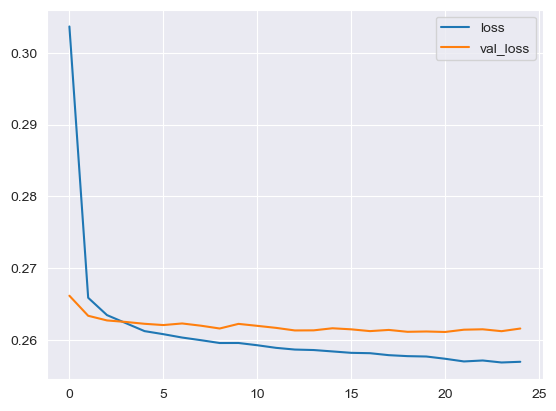

In [167]:
losses1.plot()

In [168]:
preds = model.predict(X_test)

2471/2471 [==============================] - 5s 2ms/step


In [169]:
y_preds= preds.round()

In [170]:
print(classification_report(y_test, y_preds))
print('\n')
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6781  8877]
 [   49 63337]]


We observe low recall. The objective is to improve the recall in class 0.

In [171]:
df['loan_repaid'].value_counts()

loan_repaid
1    317696
0     77523
Name: count, dtype: int64

In [172]:
(317696/len(df)) * 100

80.38479931379817

To have some perspective here about the level of what a good evaluation would be, if we just build a model that always assumes that the loan will be repaid, it would be right at approximately 80% of the time for our dataset (as it is computed above).

#### We will also try a model using an early stopping callback with a lot of epochs to see its performance

In [173]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model = Sequential()

#Start with as many neurons as features
model.add(Dense(78, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(39, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(19, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer='adam', loss= 'binary_crossentropy')

In [174]:
from tensorflow.keras.callbacks import EarlyStopping

In [175]:
early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min',
                          verbose= 1, patience= 10)

In [176]:
model.fit(x= X_train,
          y= y_train,
          epochs = 200,
          validation_data= (X_test, y_test),
          callbacks= [early_stop],
          verbose= 1,
          batch_size= 256)

Epoch 1/200
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3003 - val_loss: 0.2653
Epoch 2/200
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2661 - val_loss: 0.2636
Epoch 3/200
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2639 - val_loss: 0.2635
Epoch 4/200
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2625 - val_loss: 0.2632
Epoch 5/200
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2619 - val_loss: 0.2620
Epoch 6/200
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2612 - val_loss: 0.2618
Epoch 7/200
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 8/200
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2602 - val_loss: 0.2623
Epoch 9/200
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2599 - val_loss: 0.2617
Epoch 10/200
1236/1236 [==============================] - 6s 5ms/step - l

In [177]:
losses2= pd.DataFrame(model.history.history)
losses2.head()

,loss,val_loss
0,0.300304,0.265307
1,0.266059,0.263626
2,0.263887,0.263506
3,0.262454,0.263193
4,0.261909,0.262050


<Axes: >

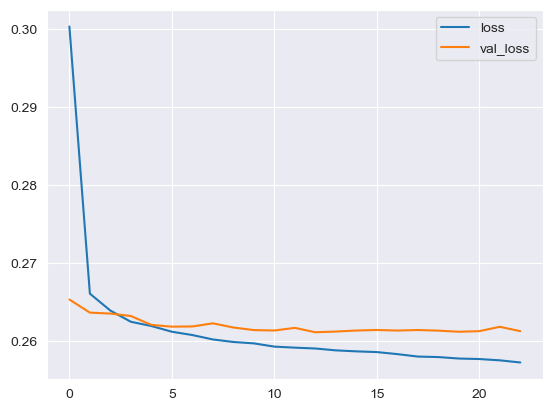

In [178]:
losses2.plot()

In [179]:
model.save('lc_3.keras')

In [180]:
pred1 = model.predict(X_test)

2471/2471 [==============================] - 5s 2ms/step


In [182]:
pred11 = pred1.round()

In [183]:
print(classification_report(y_test, pred11))
print('\n')
print(confusion_matrix(y_test, pred11))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6774  8884]
 [   30 63356]]
